# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Scientist's Salary Analysis</p>

<p style="text-align:center; ">
<img src="https://insights.dice.com/wp-content/uploads/2019/01/Salary-Increase-Pay-Raise-Better-Pay-Dice-1024x640.png" style='width: 500px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Data science</B> is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data and apply knowledge from data across a broad range of application domains. Data science is an essential part of many industries today, given the massive amounts of data that are produced and is one of the most debated topics in IT circles. Its popularity has grown over the years and companies have started implementing data science techniques to grow their businesses and increase customers satisfaction.
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#1c1c1c"> Importing Libraries</font>](#1)                   |9   | [<font color="#1c1c1c"> Employee's Origins</font>](#9)                 |
|2   | [<font color="#1c1c1c"> About Dataset</font>](#2)                         |10   | [<font color="#1c1c1c"> Salary</font>](#10)   |     
|3   | [<font color="#1c1c1c"> Basic Exploration</font>](#3)                     |11  | [<font color="#1c1c1c"> Experience Level</font>](#11)|
|4   | [<font color="#1c1c1c"> Dataset Summary</font>](#4)                       |12  | [<font color="#1c1c1c"> Employment Type</font>](#12)   |       
|5   | [<font color="#1c1c1c"> Data Preprocessing</font>](#5)      |13  | [<font color="#1c1c1c"> Company Size</font>](#13)    |     
|6   | [<font color="#1c1c1c"> Custom Palette For Visualization</font>](#6)              |14  | [<font color="#1c1c1c"> Remote Job</font>](#14)  |     
|7   | [<font color="#1c1c1c"> Top Data Science Job</font>](#7)              |15  | [<font color="#1c1c1c"> Correlation Map</font>](#15)  |    
|8   | [<font color="#1c1c1c"> Company's Origins</font>](#8)              |16  | [<font color="#1c1c1c"> Thank You</font>](#16)  | 
   

<a id="1"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# !pip install country_converter
import country_converter as coco

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<a id="2"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **work_year:** Salary payment year
* **experience_level:** Experience level at the job during the year 
* **employment_type:** Type of employement
* **job_title:** Job role during the year
* **salary:** Total gross salary amount
* **salary_currency:** Currency of salary, paid as an ISO 4217 currency code
* **salary_in_usd:** Salary in USD
* **employee_residence:** Employee's primary country of residence, as an ISO 3166 country code
* **remote_ratio:** Overall amount of work done remotely
* **company_location:** Country of employer's main office or contracting branch, as an ISO 3166 country code
* **company_size:** Amount of people worked for the company


In [39]:
data = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv",index_col=0)

<a id="3"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [40]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Shape Of The Dataset : (607, 11)

Glimpse Of The Dataset :


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [41]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [42]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Summary Of The Dataset :


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.000000,607.000000
mean,2021.405272,324000.062603,112297.869852,70.922570
std,0.692133,1544357.486636,70957.259411,40.709130
min,2020.000000,4000.000000,2859.000000,0.000000
25%,2021.000000,70000.000000,62726.000000,50.000000
50%,2022.000000,115000.000000,101570.000000,100.000000
75%,2022.000000,165000.000000,150000.000000,100.000000
max,2022.000000,30400000.000000,600000.000000,100.000000


In [43]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [44]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Null values of the Dataset :


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,0,0,0,0,0,0,0,0,0


**Insights:**

* There is no missing value.
* We will convert country code to country name.
* We will encode the categorical features into numerical form later.

<a id="5"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [45]:
data["employee_residence"] = coco.convert(names=data["employee_residence"], to="name")
data["company_location"] = coco.convert(names=data["company_location"], to="name")
data["experience_level"].replace({"EN":"Entry Level","MI":"Mid Level","EX":"Expert Level","SE":"Senior Level"},inplace=True)
data["employment_type"].replace({"PT":"Part Time","FT":"Full Time","CT":"Contractual","FL":"Freelance"},inplace=True)
data["company_size"].replace({"M":"Medium","L":"Large","S":"Small"},inplace=True)
data["remote_ratio"].replace({100:"Fully Remote",0:"Non Remote Work",50:"Partially Remote"},inplace=True)
data.rename(columns={"work_year": "work year","experience_level": "experience level","employment_type":"employment type","job_title":"job title","salary_currency":"salary currency","salary_in_usd":"salary in usd","employee_residence":"employee residence","remote_ratio": "remote ratio","company_location":"company location","company_size":"company size"}, inplace = True)
data.drop(["salary currency","salary"], axis=1, inplace=True)

In [46]:
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

After preprocessing, let's have a glimpse of the final dataset :


,work year,experience level,employment type,job title,salary in usd,employee residence,remote ratio,company location,company size
0,2020,Mid Level,Full Time,Data Scientist,79833,Germany,Non Remote Work,Germany,Large
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,Japan,Non Remote Work,Japan,Small
2,2020,Senior Level,Full Time,Big Data Engineer,109024,United Kingdom,Partially Remote,United Kingdom,Medium
3,2020,Mid Level,Full Time,Product Data Analyst,20000,Honduras,Non Remote Work,Honduras,Small
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,United States,Partially Remote,United States,Large


In [47]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

After preprocessing, let's have a look on the summary of the dataset :


,work year,salary in usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [48]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,count,unique,top,freq
experience level,607,4,Senior Level,280
employment type,607,4,Full Time,588
job title,607,50,Data Scientist,143
employee residence,607,57,United States,332
remote ratio,607,3,Fully Remote,381
company location,607,50,United States,355
company size,607,3,Medium,326


<a id="6"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [49]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
sns.set_context("poster",font_scale = .7)

palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Top Data Science Job</p>

Let's have a look on the familiar data science jobs :


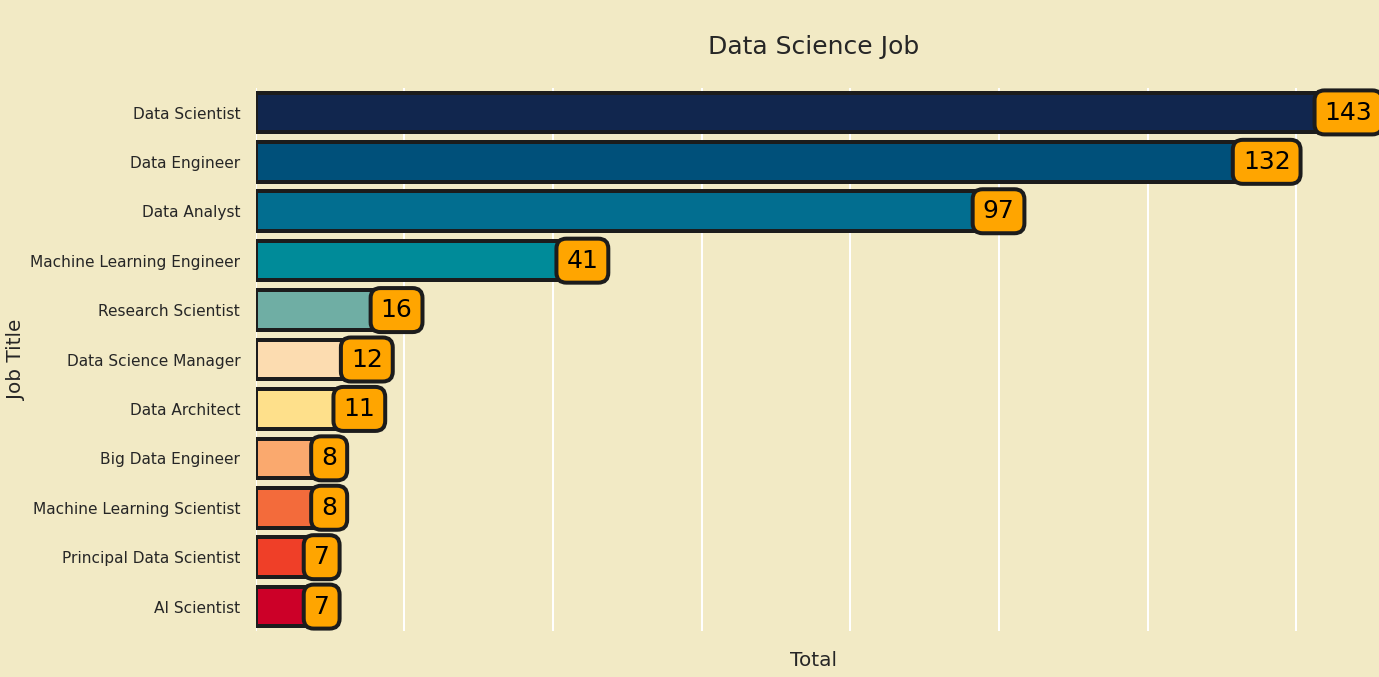

In [50]:
print("Let's have a look on the familiar data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.countplot(y=data["job title"],order=data["job title"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Data Scientist** is the most familiar job title followed by **Data Engineer** and **Data Analyst**.


<a id="8"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Company's Origins</p>

Let's have a look on the company's origins :


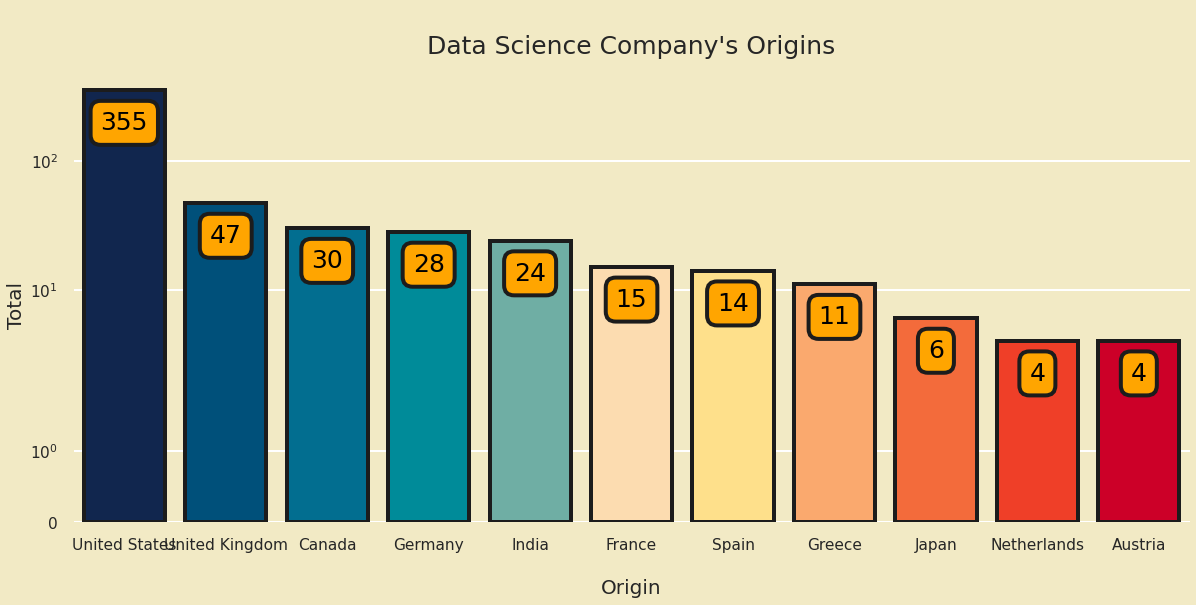

In [51]:
print("Let's have a look on the company's origins :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(x=data["company location"],order=data["company location"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("symlog")
p.axes.set_title("\nData Science Company's Origins\n",fontsize=25)
p.axes.set_xlabel("\nOrigin",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Companies In North America :


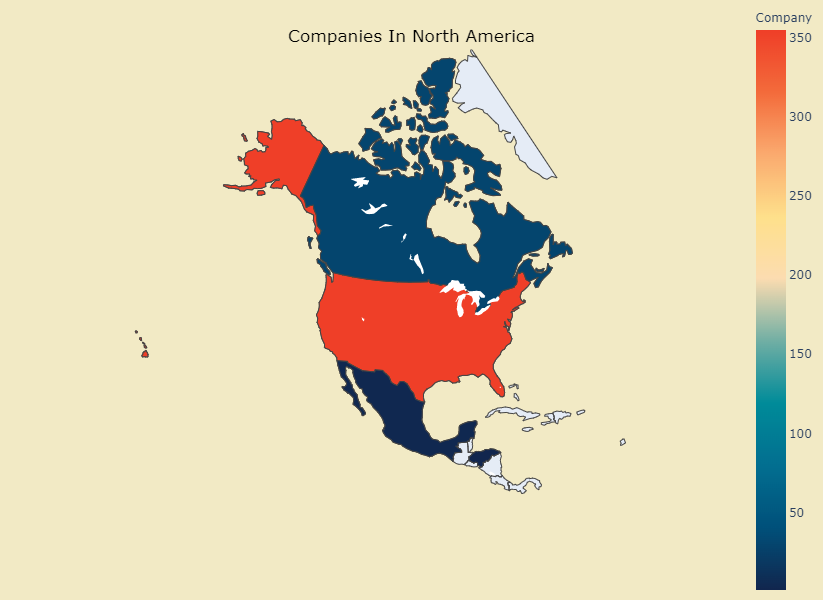

In [52]:
print("Companies In North America :")

fig = px.choropleth(data_frame = data["company location"].value_counts(),
                    locations=data["company location"].value_counts().index,locationmode="country names", color=data["company location"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="north america",
                    labels={"color":"Company","locations":"Country"})


fig.update_layout(title=dict(text= "Companies In North America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

Companies In Europe :


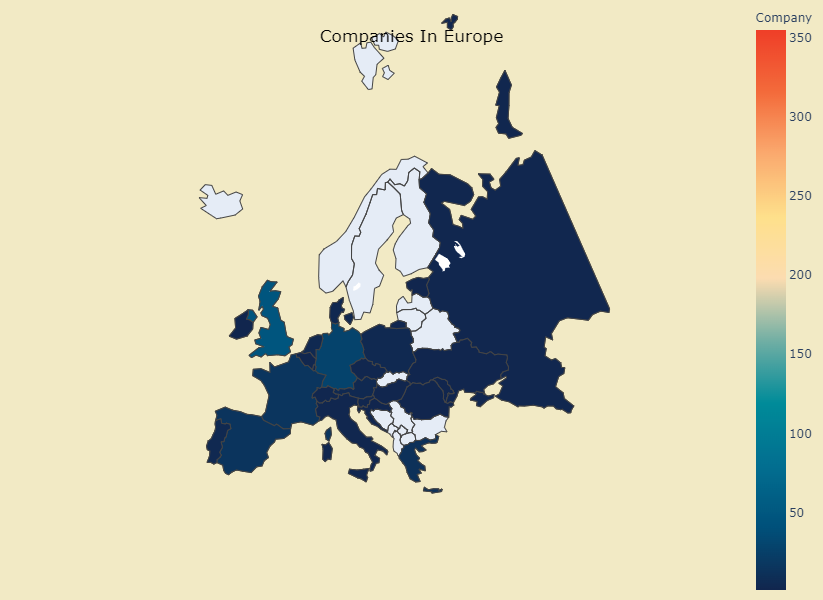

In [53]:
print("Companies In Europe :")

fig = px.choropleth(data_frame = data["company location"].value_counts(),
                    locations=data["company location"].value_counts().index,locationmode="country names", color=data["company location"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="europe",
                    labels={"color":"Company","locations":"Country"})


fig.update_layout(title=dict(text= "Companies In Europe",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

**Insights:**

* **United States** belongs the most data science companies followed by **United Kingdom**, **Canada**, **Germany** and others.
* Highest number of companies are located in **North America** Continent followed by **Europe**.
* Companies are growing in Asian region too.

<a id="9"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Employee's Origins</p>

Let's have a look on the employee's origins :


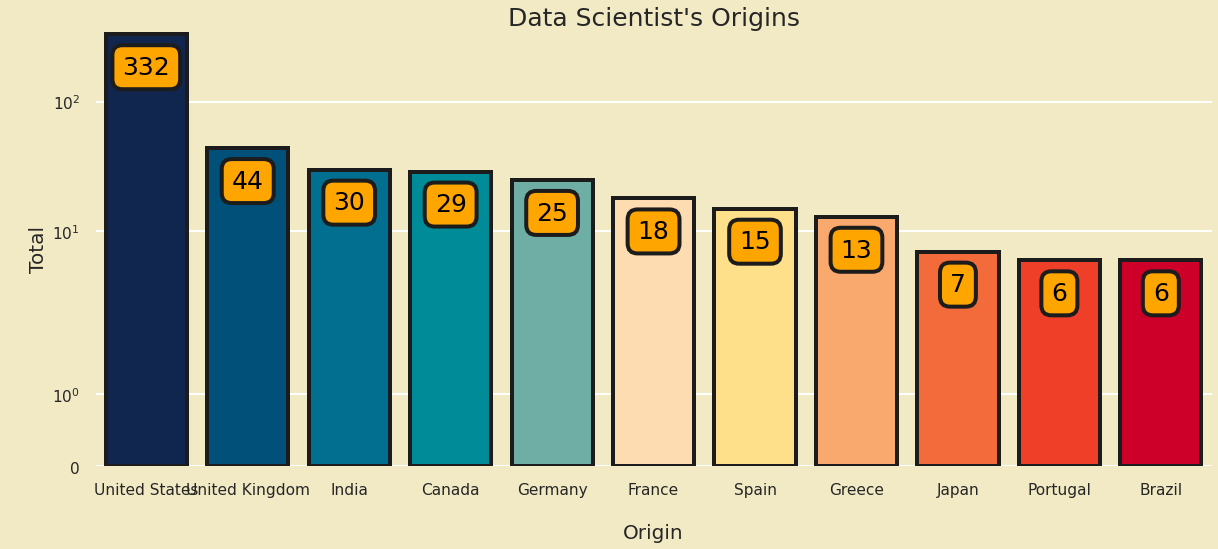

In [54]:
print("Let's have a look on the employee's origins :")
plt.subplots(figsize=(20, 8))

p=sns.countplot(x=data["employee residence"],order=data["employee residence"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("symlog")
p.axes.set_title("Data Scientist's Origins",fontsize=25)
p.axes.set_ylabel("\nTotal",fontsize=20)
p.axes.set_xlabel("\nOrigin",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Data Scientists From North America :


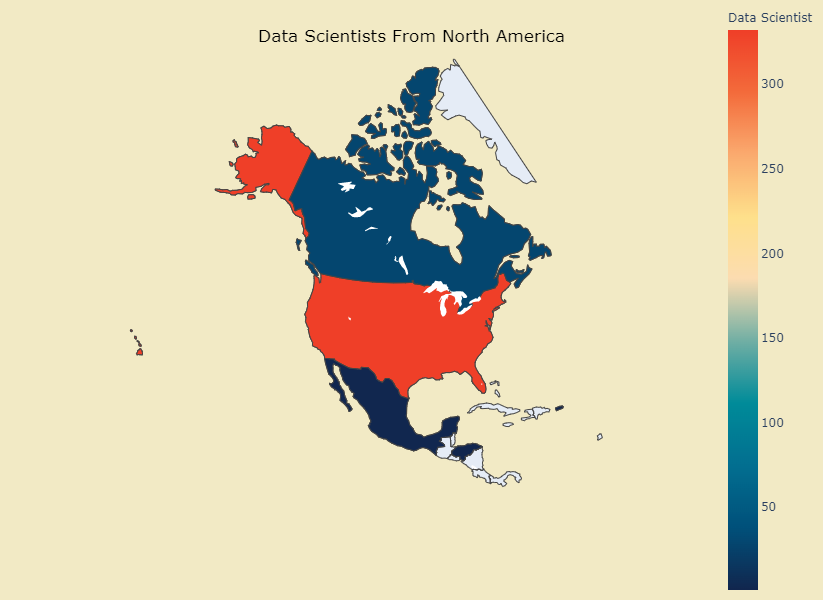

In [55]:
print("Data Scientists From North America :")

fig = px.choropleth(data_frame = data["employee residence"].value_counts(),
                    locations=data["employee residence"].value_counts().index,locationmode="country names", color=data["employee residence"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="north america",
                    labels={"color":"Data Scientist","locations":"Country"})


fig.update_layout(title=dict(text= "Data Scientists From North America",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

Data Scientists From Europe :


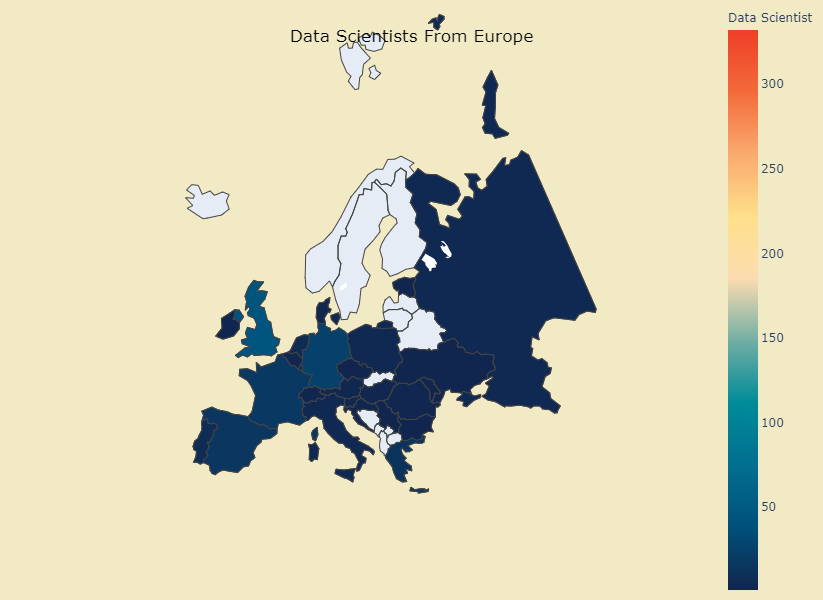

In [56]:
print("Data Scientists From Europe :")

fig = px.choropleth(data_frame = data["employee residence"].value_counts(),
                    locations=data["employee residence"].value_counts().index,locationmode="country names", color=data["employee residence"].value_counts().values,
                    color_continuous_scale=palette[:10],height= 600,scope="europe",
                    labels={"color":"Data Scientist","locations":"Country"})


fig.update_layout(title=dict(text= "Data Scientists From Europe",
                             y=0.95,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  margin=dict(l=0, r=0, b=0, t=0),
                  geo_bgcolor="#F2EAC5",
                  paper_bgcolor="#F2EAC5")

fig.show()

**Insights:**

* **United States** belongs the most data scientist followed by **United Kingdom**, **India**, **Canada** and others.
* Most of the data scientists are from **North America** or **Europe**.
* This profession is becoming familiar in Asian region too.

<a id="10"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Salary</p>

Let's have a look on the distribution of salaries :


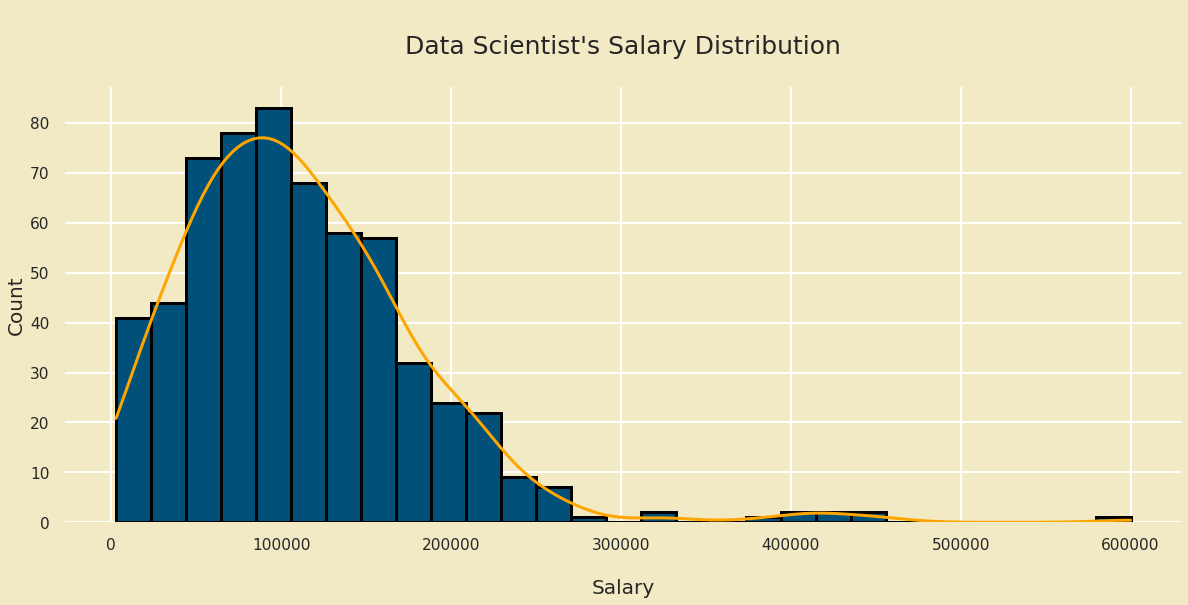

In [57]:
print(f"Let's have a look on the distribution of salaries :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["salary in usd"],color=palette[1],kde=True,bins="auto",alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nData Scientist's Salary Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSalary",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* Though very few earns more than average data scientist's earning but maximum data scientist's salaries fall in between **50000** to **150000**

Let's have a look on the highest paid data science jobs :


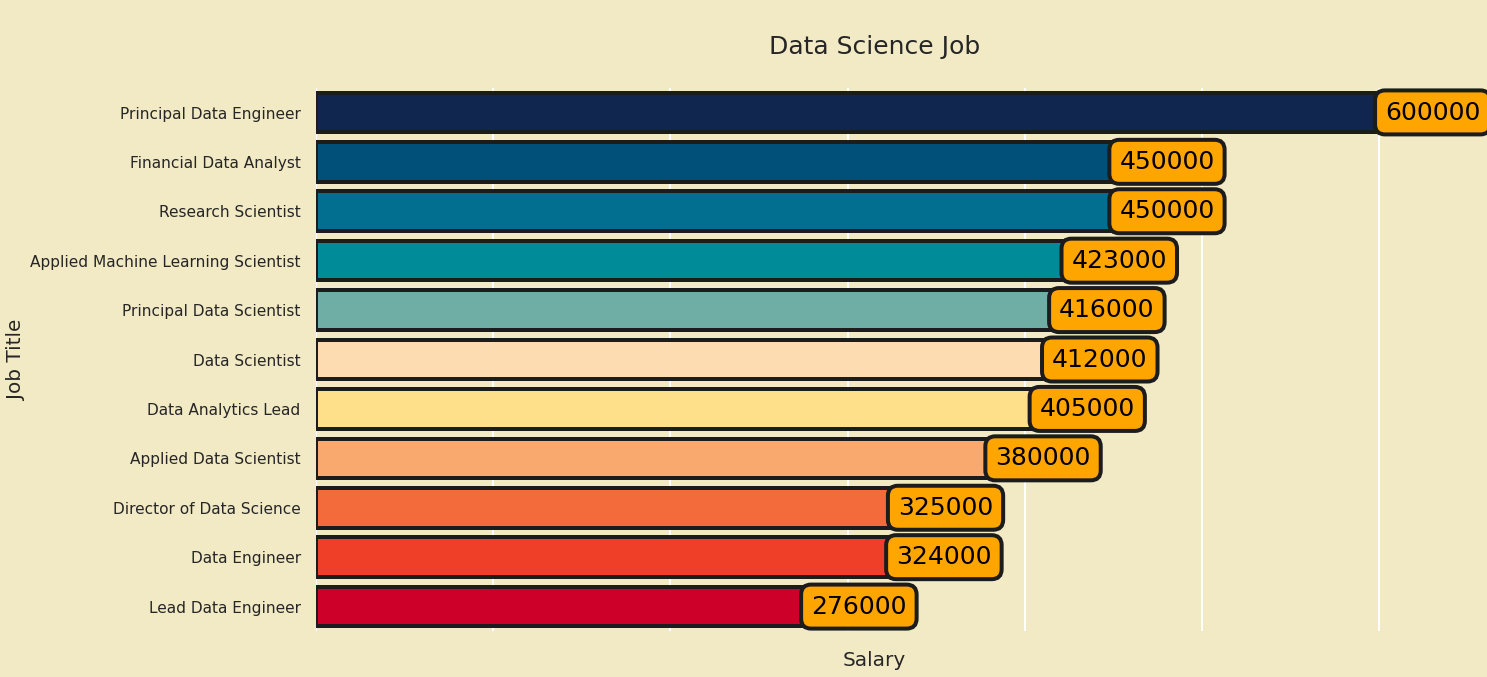

In [58]:
data_high = data.copy()
data_high = pd.DataFrame(data_high.groupby("job title")["salary in usd"].max())

print("Let's have a look on the highest paid data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_high.index,x=data_high["salary in usd"],order=data_high.sort_values("salary in usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Principal Data Engineer** is the highest paid job role followed by **Financial Data Analyst**, **Research Scientist** and other job roles.


Let's have a look on the average paid data science jobs :


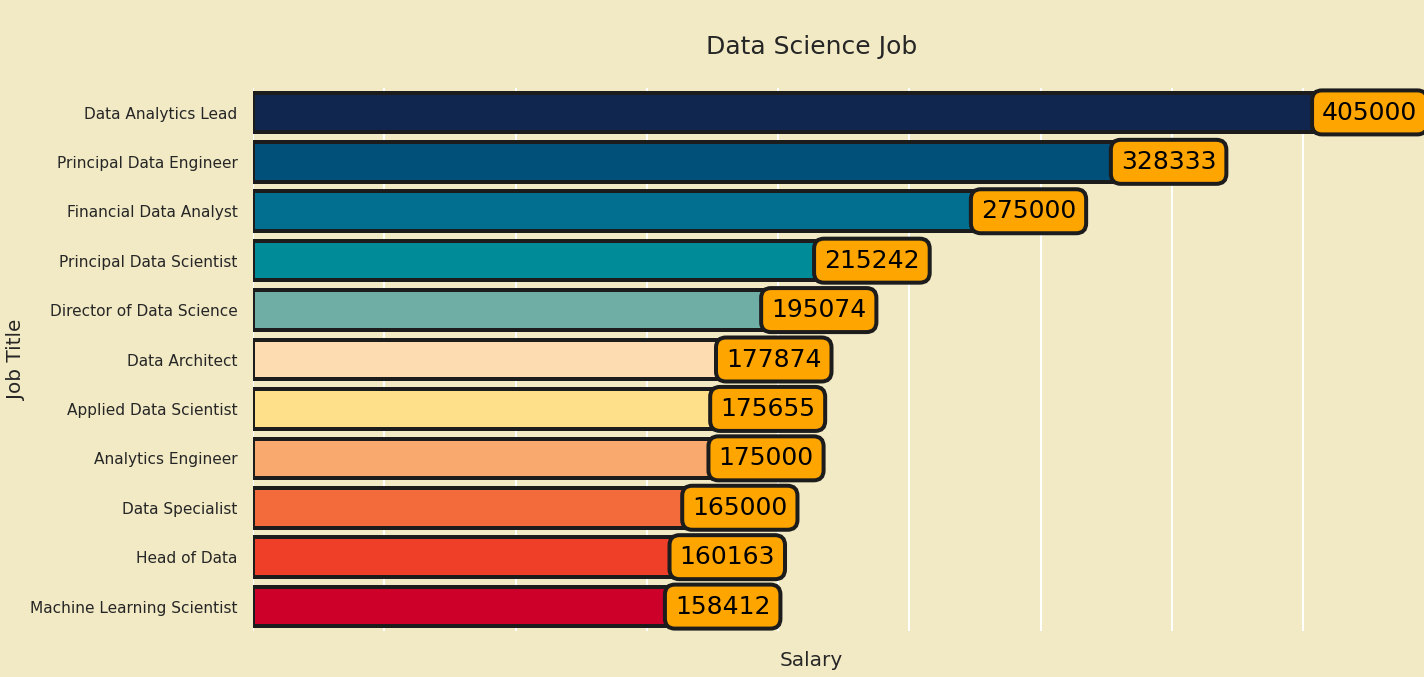

In [59]:
data_avg = data.copy()
data_avg = pd.DataFrame(data_avg.groupby("job title")["salary in usd"].mean())

print("Let's have a look on the average paid data science jobs :")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_avg.index,x=data_avg["salary in usd"],order=data_avg.sort_values("salary in usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Data Analytics Lead** is leading in average salary followed by **Principal Data Engineer**, **Financial Data Analyst** and others.
* Though someone got paid highly in **Principal Data Engineer** and **Financial Data Analyst** role but the average salary of this job role is not the highest one.


Let's have a look on the timeline of average salary :


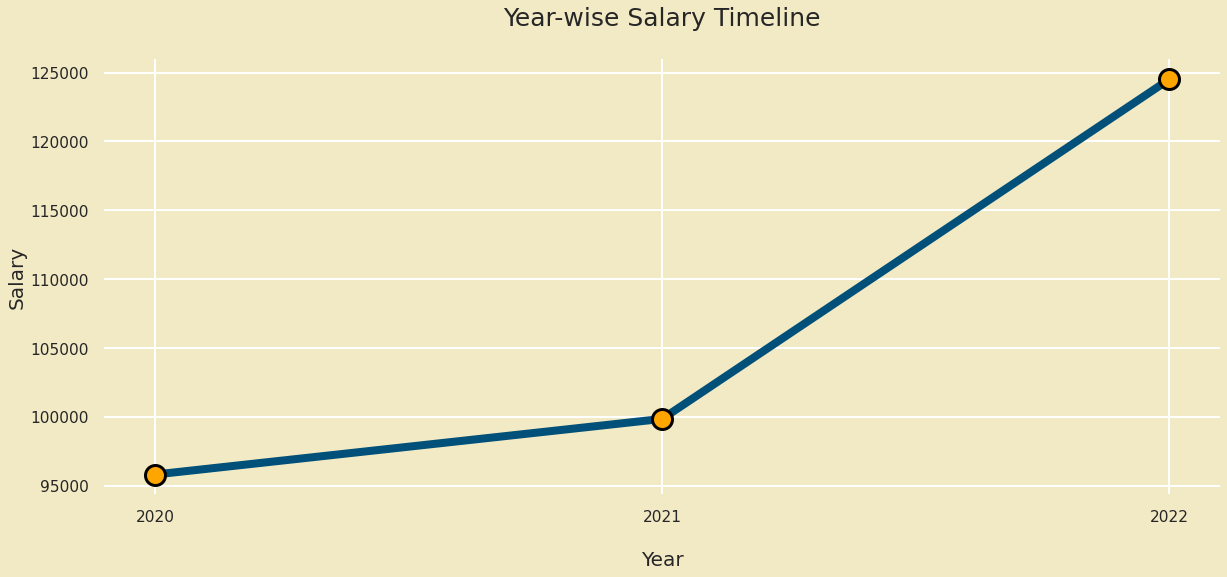

In [60]:
data_timeline = pd.DataFrame(data.groupby("work year")["salary in usd"].mean())
data_timeline = data_timeline.reset_index()
data_timeline["work year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)

print(f"Let's have a look on the timeline of average salary :")
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=data_timeline["work year"] ,y=data_timeline["salary in usd"],data=data_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("Year-wise Salary Timeline\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* We can see, data scintist's average salary is increasing by time.

<a id="11"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Experience Level</p>

Let's have a look on the ratio of experience level :


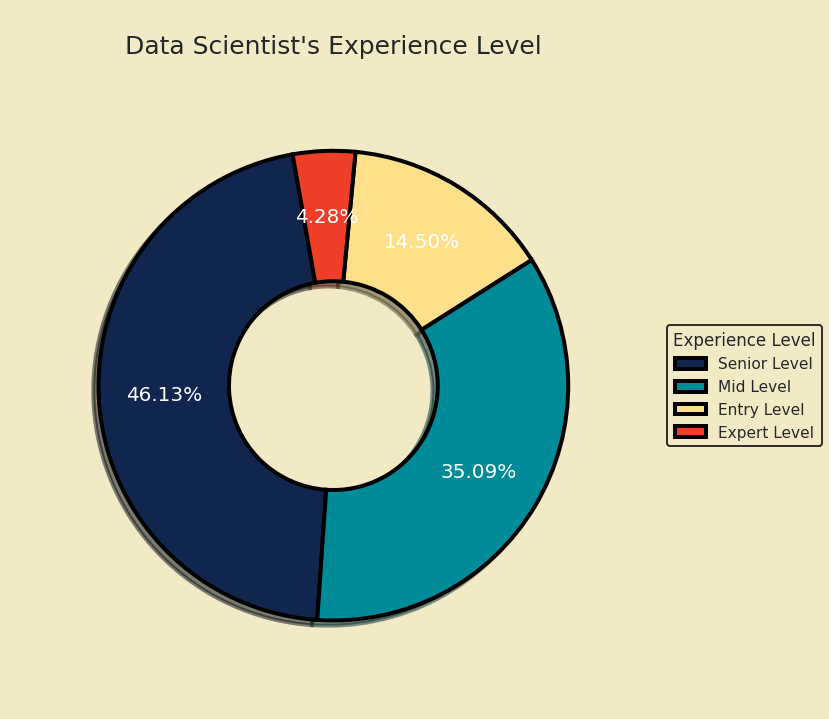

In [61]:
print(f"Let's have a look on the ratio of experience level :")
plt.subplots(figsize=(12, 12))

labels = "Senior Level","Mid Level","Entry Level","Expert Level"
size = 0.5

wedges, texts, autotexts = plt.pie([data["experience level"].value_counts().values[0],
                                    data["experience level"].value_counts().values[1],
                                    data["experience level"].value_counts().values[2],
                                    data["experience level"].value_counts().values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:11:3], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Experience Level",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Experience Level",fontsize=25)
plt.show()

Let's have a look on the experience level :


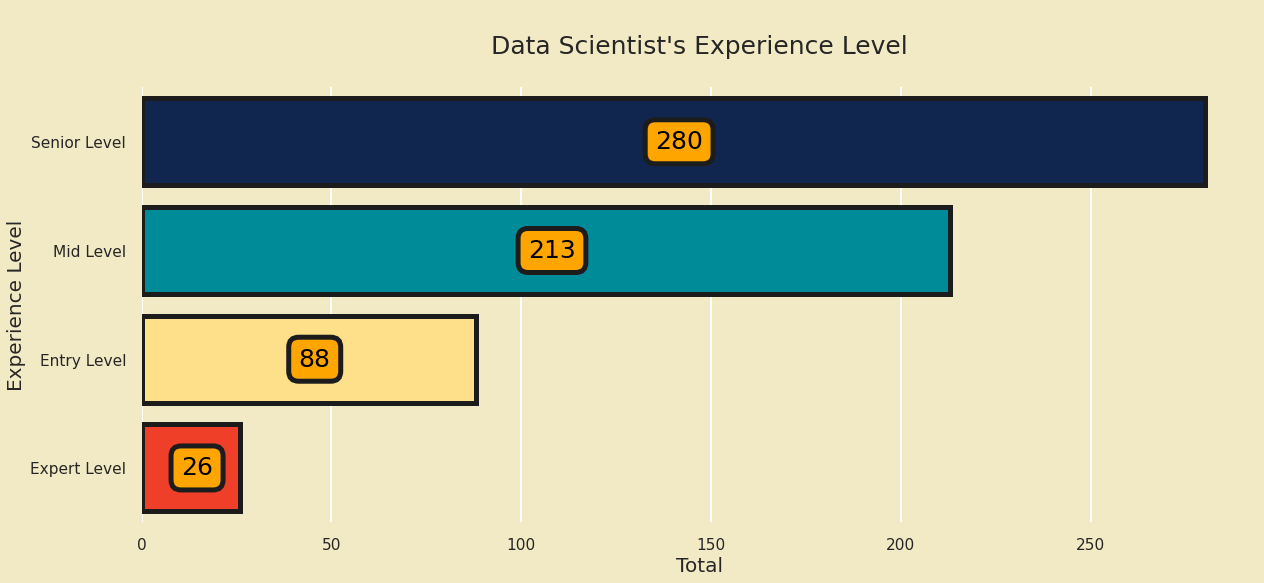

In [62]:
print("Let's have a look on the experience level :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["experience level"],order=data["experience level"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nData Scientist's Experience Level\n",fontsize=25)
p.axes.set_ylabel("Experience Level",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data scientists are in **Senior Level** with a ratio of **46.13%** followed by **Mid Level** and **Entry Level**
* Only few are in **Expert Level** with a ratio of **4.28%**.

Let's have a look on the salary distribution of experience level :


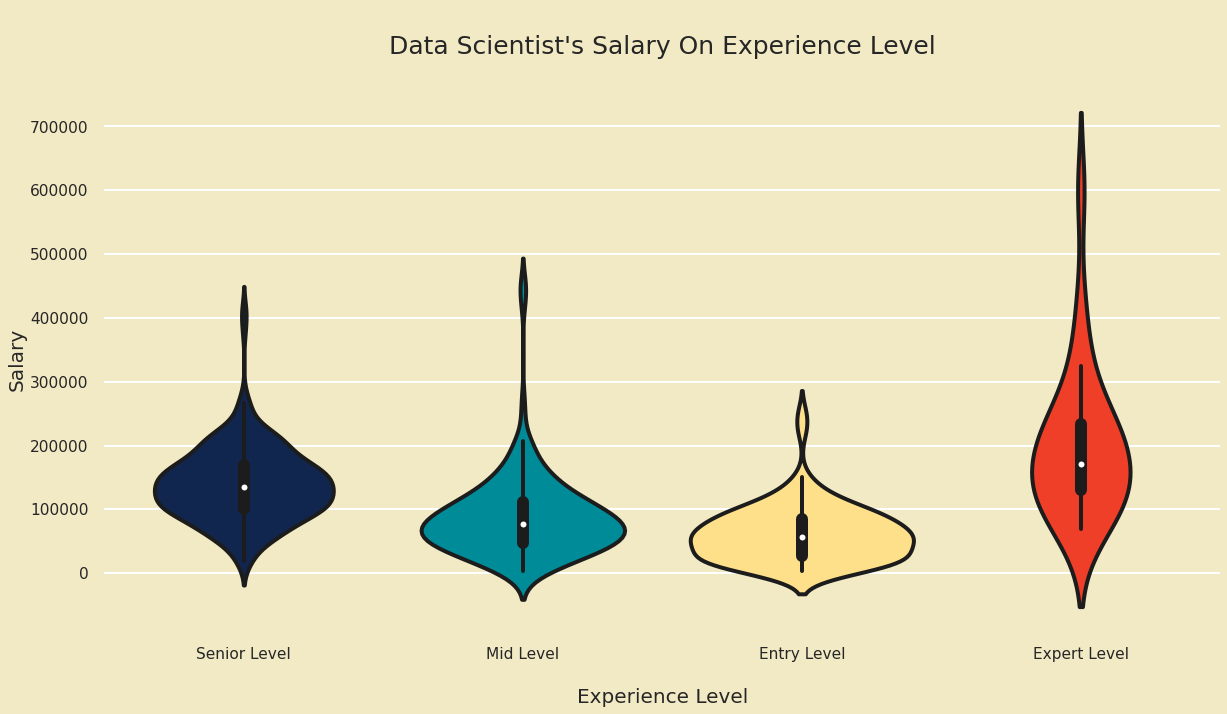

In [63]:
print("Let's have a look on the salary distribution of experience level :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["experience level"],y=data["salary in usd"],order=data["experience level"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Experience Level\n",fontsize=25)
p.axes.set_xlabel("\nExperience Level",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Expert Level** earns highest of others. Also their earning range is higher than others.
* Most of the **Senior Level** guys earn in between **100000** to **140000**
* Most of the **Mid Level** guys earn in between **60000** to **80000**
* Most of the **Entry Level** guys earn in between **30000** to **50000**

<a id="12"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Employment Type</p>

Let's have a look on the employment type :


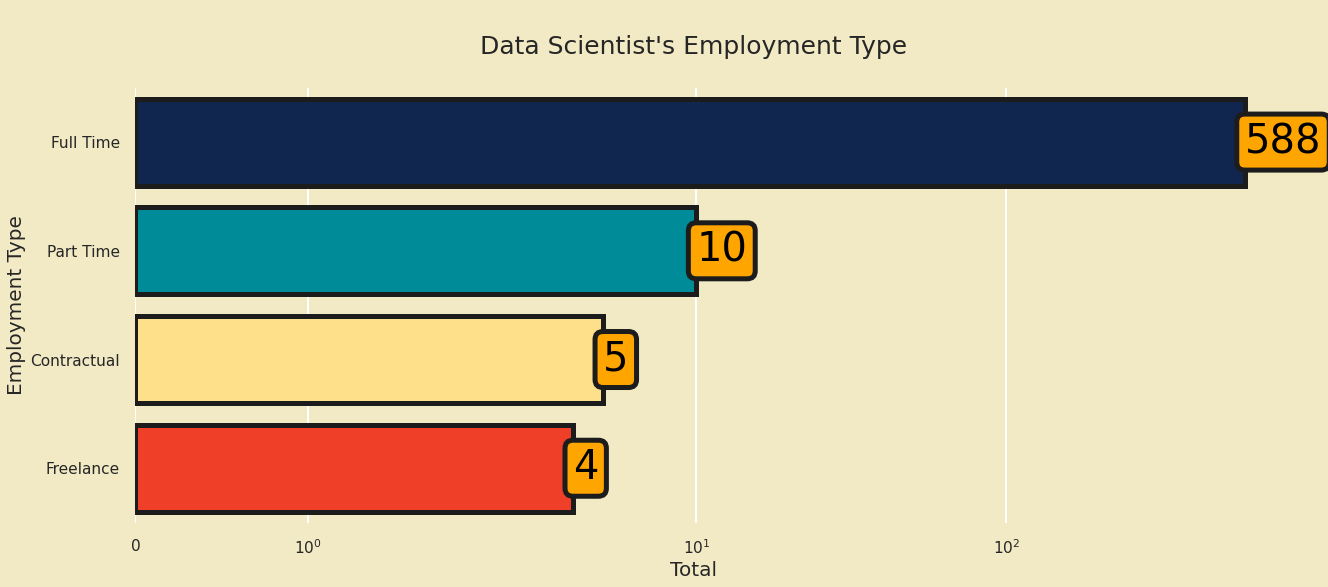

In [64]:
print("Let's have a look on the employment type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["employment type"],order=data["employment type"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("symlog")
p.axes.set_title("\nData Scientist's Employment Type\n",fontsize=25)
p.axes.set_ylabel("Employment Type",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=0,size=40,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data scientist's employment types are **Full Time** followed by **Part Time** and **Contractual**
* Only a few are **Freelancer**.

Let's have a look on the salary distribution of employment type :


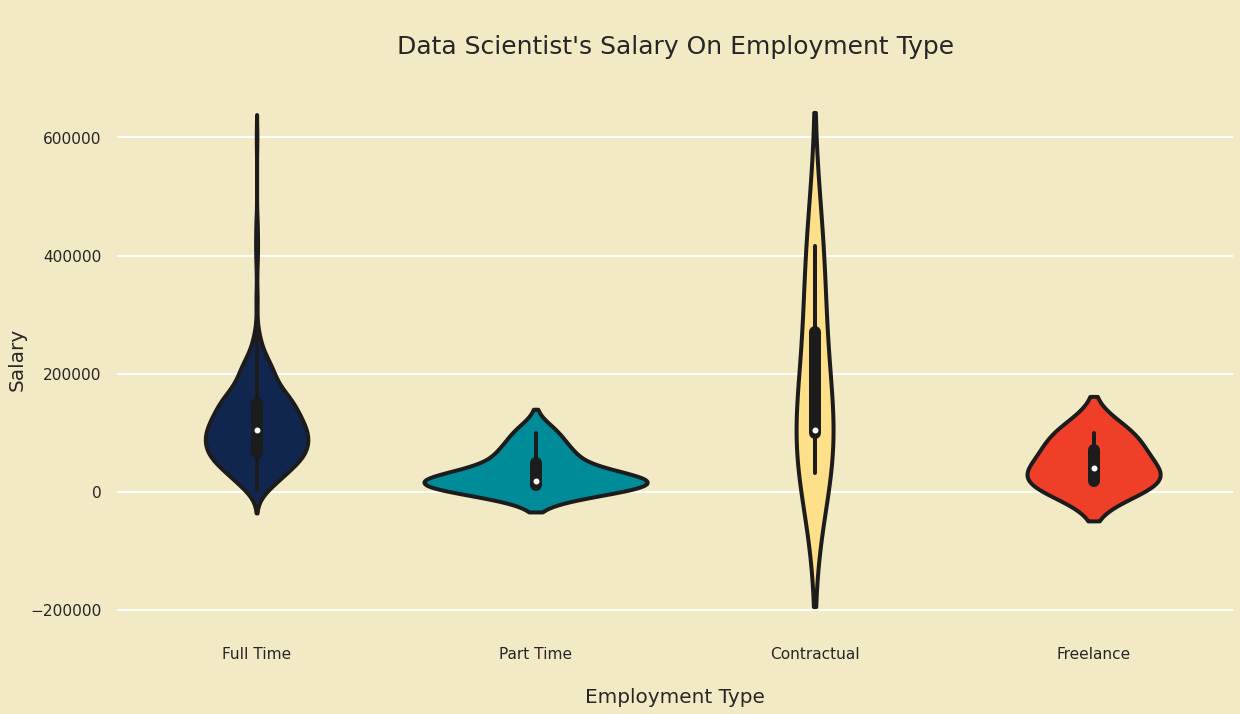

In [65]:
print("Let's have a look on the salary distribution of employment type :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["employment type"],y=data["salary in usd"],order=data["employment type"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Employment Type\n",fontsize=25)
p.axes.set_xlabel("\nEmployment Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Contractual** job holders earn as much as **Full Time** job holders. 
* Most of the **Full Time** job holders earn in between **80000** to **110000**
* Most of the **Part Time** job holders earn in between **10000** to **30000**
* Most of the **Freelancers** earn in between **20000** to **50000**

<a id="13"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Company Size</p>

Let's have a look on the ratio of company sizes :


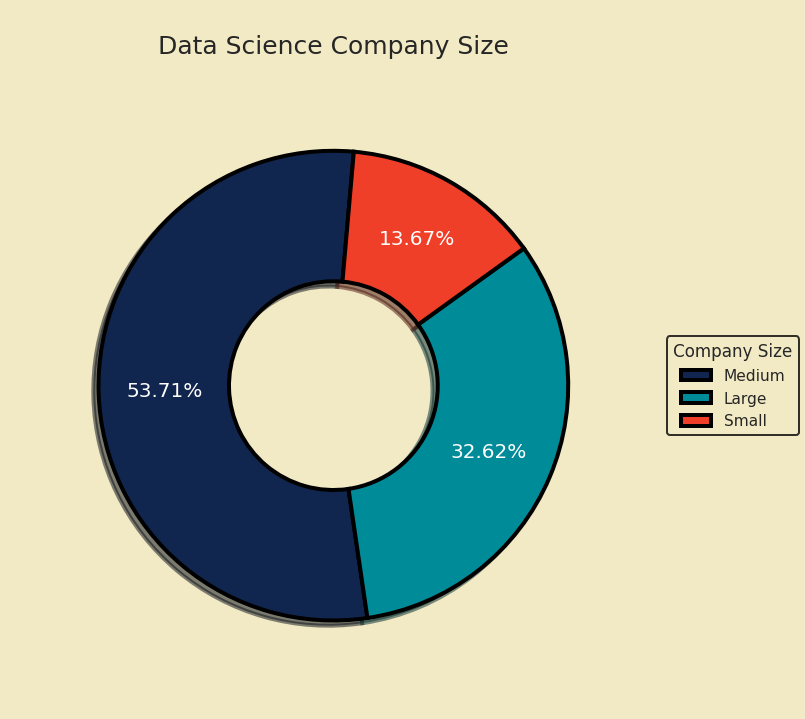

In [66]:
print(f"Let's have a look on the ratio of company sizes :")
plt.subplots(figsize=(12, 12))

labels = "Medium","Large","Small"
size = 0.5

wedges, texts, autotexts = plt.pie([data["company size"].value_counts().values[0],
                                    data["company size"].value_counts().values[1],
                                    data["company size"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#008b99","#ef3f28"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Company Size",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Science Company Size",fontsize=25)
plt.show()

Let's have a look on the company size :


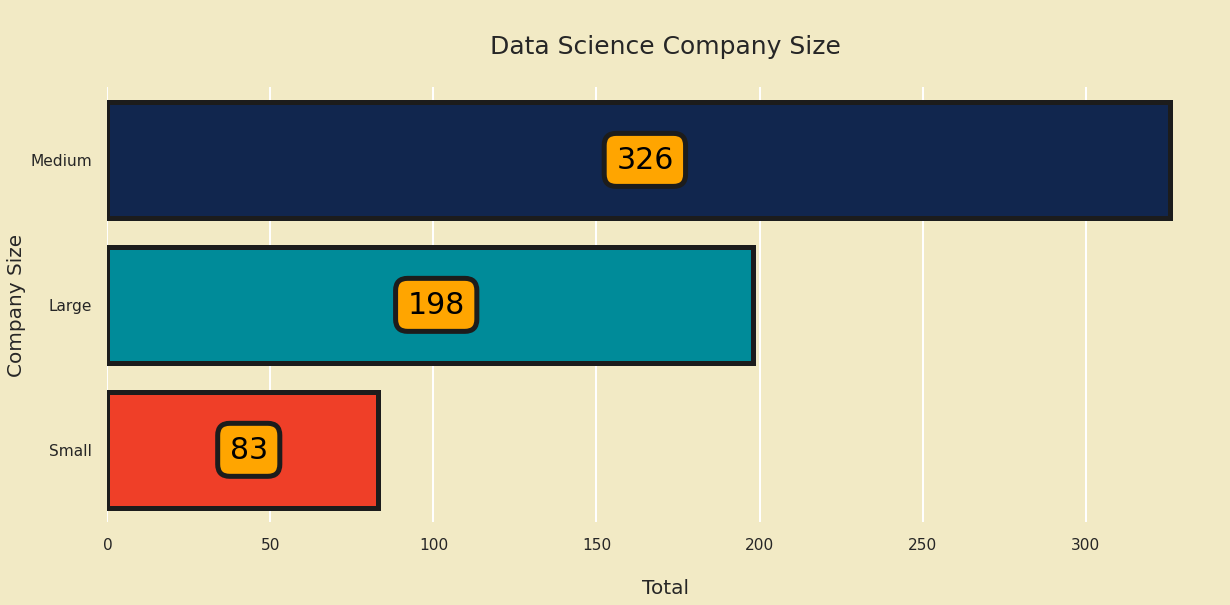

In [67]:
print("Let's have a look on the company size :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["company size"],order=data["company size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("linear")
p.axes.set_title("\nData Science Company Size\n",fontsize=25)
p.axes.set_ylabel("Company Size",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data science companies are **Medium** with a ratio of **53.71%** followed by **Large** companies with a ratio of **32.62%**.
* Only a few are **Small** with a ratio of **13.67%**.

Let's have a look on the salary distribution of company size :


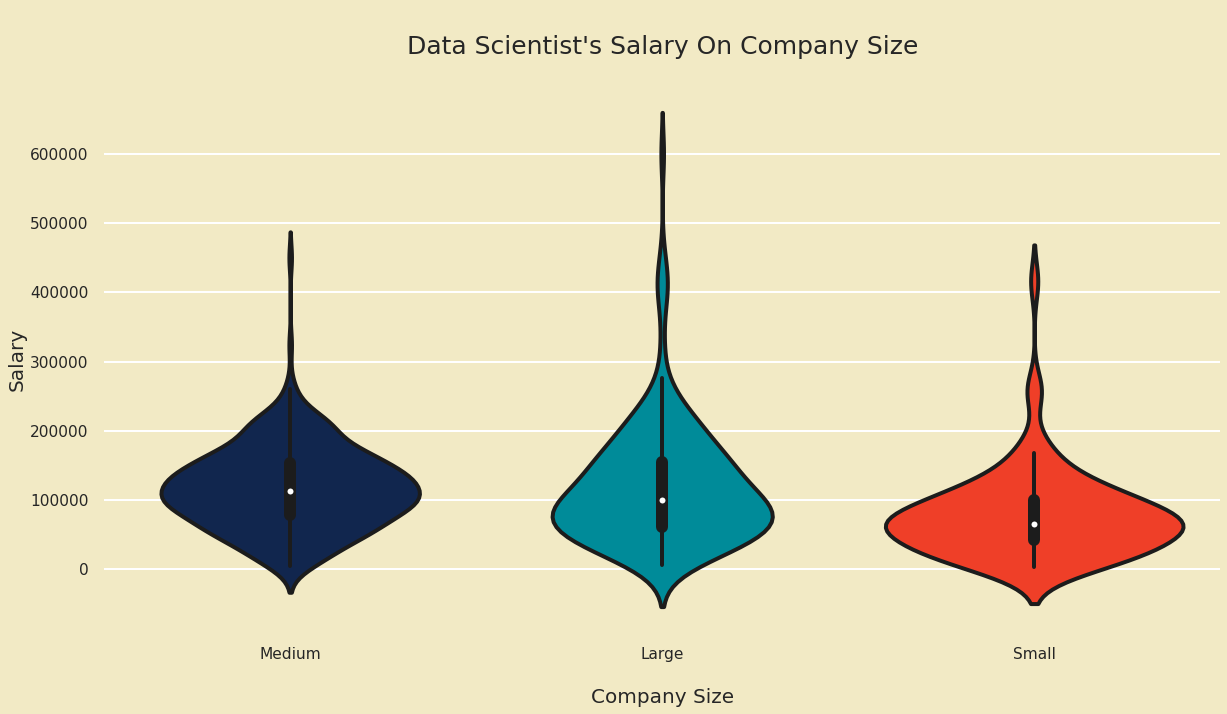

In [68]:
print("Let's have a look on the salary distribution of company size :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["company size"],y=data["salary in usd"],order=data["company size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Company Size\n",fontsize=25)
p.axes.set_xlabel("\nCompany Size",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Large** companies earn highest than others. 
* Most of the **Medium** company's job holders earn in between **90000** to **120000**
* Most of the **Large** company's job holders earn in between **70000** to **90000**
* Most of the **Small** company's job holders earn in between **60000** to **80000**

<a id="14"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Remote Job</p>

Let's have a look on the ratio of job types :


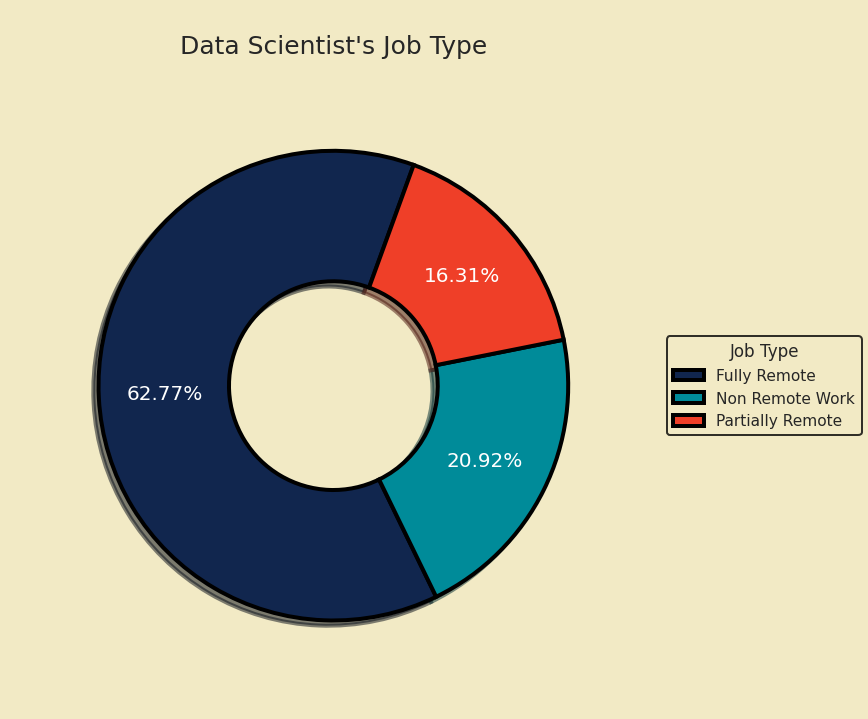

In [69]:
print(f"Let's have a look on the ratio of job types :")
plt.subplots(figsize=(12, 12))

labels = "Fully Remote","Non Remote Work","Partially Remote"
size = 0.5

wedges, texts, autotexts = plt.pie([data["remote ratio"].value_counts().values[0],
                                    data["remote ratio"].value_counts().values[1],
                                    data["remote ratio"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#008b99","#ef3f28"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 70)

plt.legend(wedges, labels, title="Job Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Job Type",fontsize=25)
plt.show()

Let's have a look on the job types :


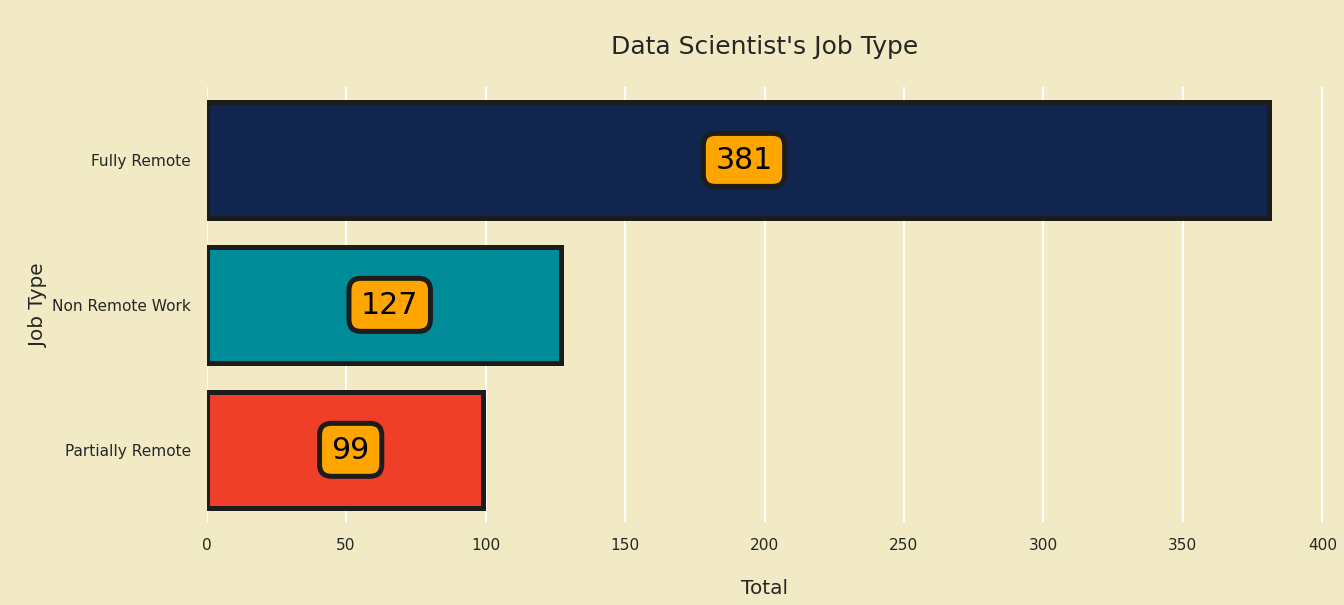

In [70]:
print("Let's have a look on the job types :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["remote ratio"],order=data["remote ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("linear")
p.axes.set_title("\nData Scientist's Job Type\n",fontsize=25)
p.axes.set_ylabel("\nJob Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data science companies provide **Fully Remote** jobs with a ratio of **62.77%** followed by **Non Remote** jobs with a ratio of **20.92%**.
* Only a few are **Partially Remote** with a ratio of **16.31%**.

Let's have a look on the salary distribution of job types :


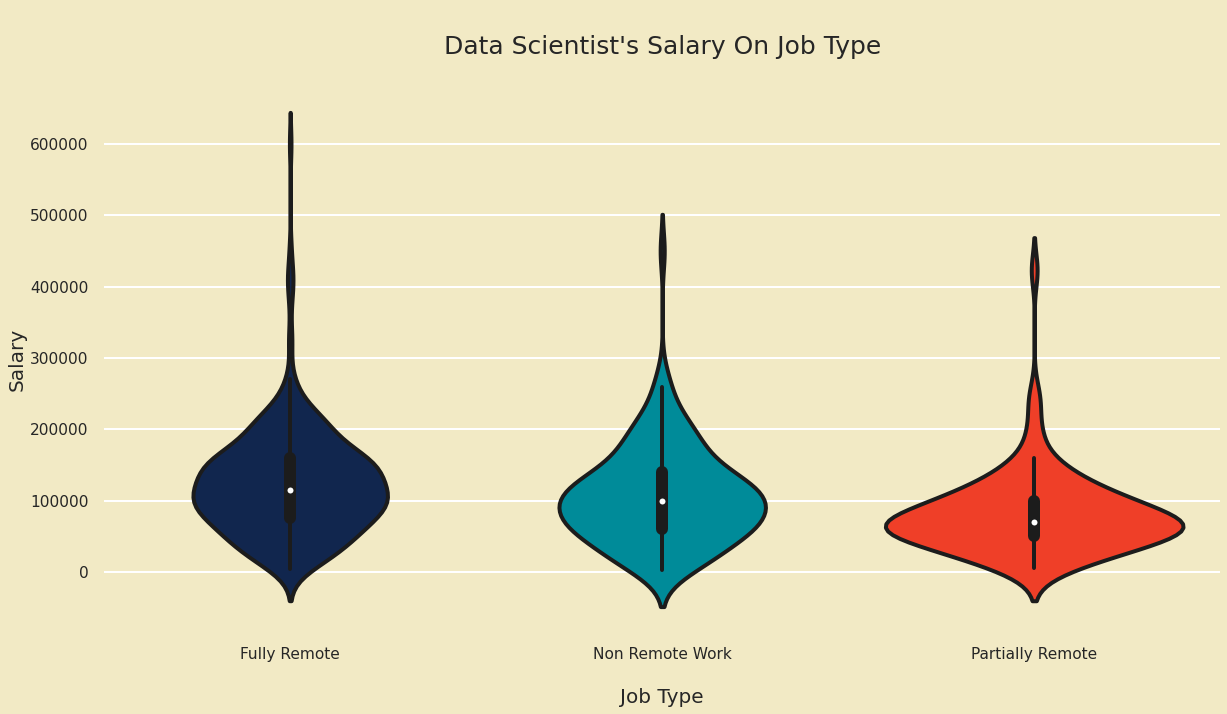

In [71]:
print("Let's have a look on the salary distribution of job types :")
plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=data["remote ratio"],y=data["salary in usd"],order=data["remote ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nData Scientist's Salary On Job Type\n",fontsize=25)
p.axes.set_xlabel("\nJob Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Fully Remote** jobs earn highest than others. 
* Most of the **Fully Remote** job holders earn in between **80000** to **150000**
* Most of the **Non Remote** job holders earn in between **70000** to **110000**
* Most of the **Partially remote** job holders earn in between **60000** to **80000**

<a id="15"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

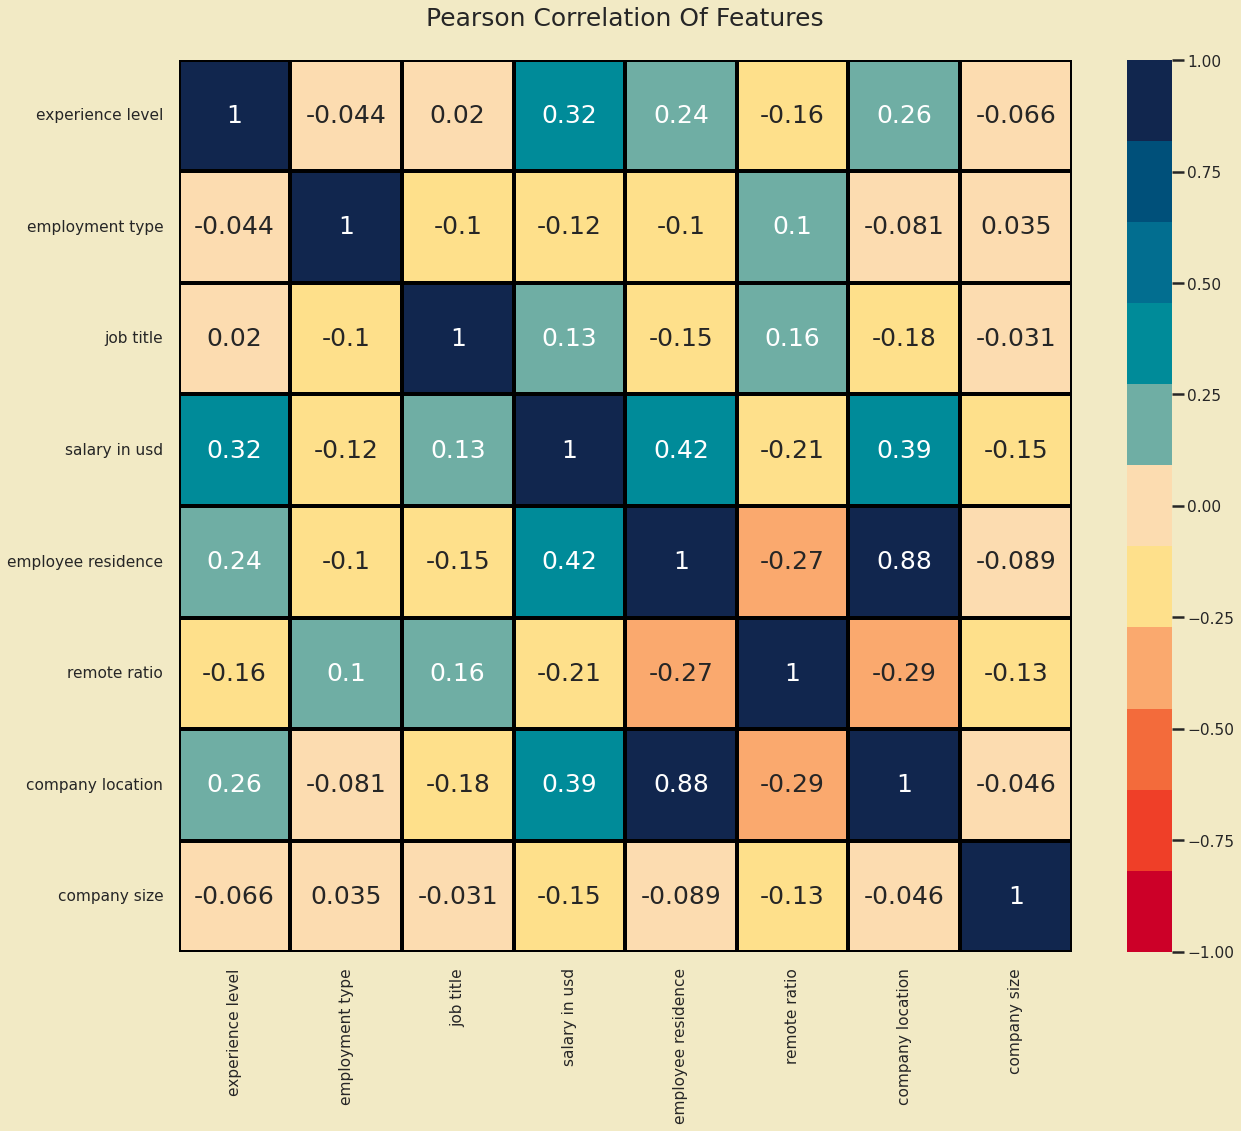

In [72]:
catcol = ["experience level","employment type","job title","employee residence","remote ratio","company location","company size"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop("work year",axis=1).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=4,linecolor='black',annot_kws=dict(fontsize =25))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

**Insights:**

* High correlation between employee residence and company location. 
* Medium correlation between salary in usd and experience level, salary in usd and company location, salary in usd and employee residence.

<a id="16"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>



<p>
<h3><font color="#1c1c1c">If you liked this notebook please upvote. Your feedback will be highly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Hasib Al Muzdadid</h3>

<b>👉Shoot me mails :</b> muzdadid@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/hasibalmuzdadid <br>
<b>👉Explore Github :</b> https://github.com/HasibAlMuzdadid    
    
</p> 